#*Question 1*

  How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


---



*Answer)*  Doing a n×k times k×m matrix multiplication which mean every entry of the result is a scalar product of of two k-vectors, which requires **n x k x m **multiplications and **n(k−1)m** additions in total.

#*Question 2*

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


---



In [13]:
# Matrix multiplication using list of list
import random
import time

# Input matrix X of [10 x 20] and Y of [20 x 30]
X = [[random.randint(1, 100) for x in range(20)] for y in range(10)]
Y = [[random.randint(1, 100) for x in range(30)] for y in range(20)]

# resultant matrix of [10 x 30]
result = [[0 for x in range(30)] for y in range(10)]

# calulates start time for matrix multiplication
start = time.time()

# performs matrix multiplication
for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]

# calulates end time for matrix multiplication
end = time.time()

print(" ")
print("Execution time using list of list: ", (end - start)* 10**3,"ms")

 
Execution time using list of list:  4.375934600830078 ms


Performing the same operation using numpy

In [14]:
# Matrix multiplication using numpy
import numpy as np
import time
 
# input two matrices
X = np.random.random_sample(size = (10,20))
Y = np.random.random_sample(size = (20,30))

# calulates start time for matrix multiplication
start = time.time()

# multiplying two matrices
result = np.dot(X,Y)

# calulates start time for matrix multiplication
end = time.time()  

print("Execution time using numpy: ", (end - start)* 10**3,"ms")

Execution time using numpy:  0.3063678741455078 ms


In the first case when we are performing matrix multiplication using list of list it is taking slightly more time than when we are using numpy for the same operation. This is beacause, numpy divides the entire problem into many smaller subgroups and performs the same operation on each subgrops paralley. For this reason numpy is widely used in more complex computations.

#Question 3

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

---



Suppose an unsorted array of $n$ number of elements is given. 

> To find the highest element in a list of **$n$** elements in one pass requires **$O(n)$**. To find the second highest element it requires **$O(2n)$**, therefore in order to find nth highest element it requires **$O(n*n)$ = $O(n^2)$**. By using the same method the time complexity to find the median of an array will take $O(n^2)$ at worst case, where we can find the highest element in the array and then removing it from the array to find the second highest. In the same way recursively we can find the median of the array.

> The same time complexity can be improved if we sort the array and then find the median which can improve the time by $O(nlogn)$.

Let us see both the methods with the help of code snippet.

In [15]:
# Method 1: 
# find the highest element in the array and 
# then removing it from the array to find the second highest. 
# In the same way recursively we can find the median of the array.

import random
import time

# calulates start time
start=time.time()

# function to returns n highest elements
def max_elem(lst, N):
    res = []

    for i in range(0, n):
        max = 0

        for j in range(len(lst)):
            if lst[j] > max:
                max = lst[j]
        #removes highest element from list
        #for each pass
        lst.remove(max)
        #adds highest element to result_list
        #for each pass
        res.append(max)
        
    return res

# input list
lst = [random.randint(1, 100) for x in range(20)]

#display input list
print(lst)

# calculates length
x=len(lst)

# calculates median when len is odd
if x%2!=0:
    a=max_elem(lst,int(x/2)+1)
    print("Median:",a[-1])
else:
    # calculates median when len is even
    a=max_elem(lst,int(x/2)+1)
    print("Median:",(a[-1]+a[-2])/2)
    
# calulating end time
end = time.time()
print(" ")
print("Execution time for Method 1: ", (end - start)* 10**3,"ms")

[44, 49, 37, 5, 13, 52, 36, 82, 31, 72, 40, 65, 100, 96, 5, 92, 34, 88, 99, 46]
Median: 5.0
 
Execution time for Method 1:  11.187076568603516 ms


In [20]:
# Method 2: 
# find the median first by sorting
# calling recursively the median func

import random
import time

# calulates start time
start=time.time()

def median(lst, x):

	# First we sort the array
	lst.sort()

	if x % 2 != 0:
		return (lst[int(x/2)])

	return ((lst[int((x-1)/2)] +
				lst[int(x/2)])/2.0)

# input list
lst= [random.randint(1, 100) for x in range(20)]
x = len(lst)
print(lst)

medi_elem = median(lst,x)
print("\nArray after sort:\n ",lst)

print(" ")
print("Median of sorted array: ",medi_elem)

# calulating end time
end = time.time()
print(" ")
print("Execution time for Method 2: ", (end - start)* 10**3,"ms")

[13, 96, 93, 26, 62, 64, 73, 27, 48, 55, 52, 37, 14, 17, 3, 75, 97, 82, 83, 22]

Array after sort:
  [3, 13, 14, 17, 22, 26, 27, 37, 48, 52, 55, 62, 64, 73, 75, 82, 83, 93, 96, 97]
 
Median of sorted array:  53.5
 
Execution time for Method 2:  9.98067855834961 ms


In [24]:
# Method 3:
# using numpy.median

import random
import numpy as np
import time

# calulates start time
start=time.time()

# input list
lst= [random.randint(1, 100) for x in range(20)]
print(lst)

medi=np.median(lst)
print("\nMedian of array using numpy.median: ", medi )

# calulating end time
end = time.time()
print(" ")
print("Execution time for Method 3: ", (end - start)* 10**3,"ms")

[91, 51, 61, 79, 32, 4, 18, 24, 53, 1, 73, 17, 17, 56, 70, 87, 8, 17, 24, 20]

Median of array using numpy.median:  28.0
 
Execution time for Method 3:  6.52766227722168 ms


For the above three methods the execution time is always better in terms of numpy libraries.

#Question 4

What is the gradient of the following function with respect to x and y
  for the given function?

> $x^2 y + y^3 sin(x)$

---





For the above function, the gradient in terms of $x$ and $y$ is as follows,

> $f(x,y) = \frac{\delta{f}}{\delta {x}} i + \frac{\delta{f}}{\delta {y}} j $



> $= \frac{\delta}{\delta {x}}{(x^2 y + y^3 sin(x))} i + \frac{\delta}{\delta {y}}{(x^2 y + y^3 sin(x))} j $


> $= {(2xy + y^3 cos(x))} i + {(x^2 + 3y^2 sin(x))} j $





#Question 5

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

---



In [37]:
# Comparison of JAX gradient calulation
# analytical gradient value

import jax
import random
import jax.numpy as jnp
from jax.test_util import check_grads

#function to cross check analytical value 
#of gradient by expliciet method
def analy_grad(x,y):
  res=[2*x*y + (y**3)*jnp.cos(x) , x**2 + 3*(y**2)*jnp.sin(x)]
  return res

#function to return gradient
def grad_fun(x, y):
  res = ((x**2)*y +(y**3)*jnp.sin(x))
  return res


# JAX's gradient function
gradient_function = jax.grad(grad_fun,(0,1))

# Input
x=2.0
y=3.0

print("Expliciet Gradient value: ", analy_grad(x,y))
print("JAX Gradient Function: ", gradient_function(x,y))
print("")

Expliciet Gradient value:  [DeviceArray(0.7640352, dtype=float32, weak_type=True), DeviceArray(28.55103, dtype=float32, weak_type=True)]
JAX Gradient Function:  (DeviceArray(0.7640352, dtype=float32, weak_type=True), DeviceArray(28.55103, dtype=float32, weak_type=True))



#Question 6

Use sympy to confirm that you obtain the same gradient analytically.

---



In [48]:
# Using sympy cross check our gradient result

import sympy as sy
import numpy as np
from sympy import *
from sympy.vector import gradient

#differentiating in terms of x
a = sy.diff( ((x**2)*y) + ((y**3)*sin(x)), x)

#differentiating in terms of y
b = sy.diff( ((x**2)*y) + ((y**3)*sin(x)), y)

#display output equation
print(a,"+",b)

2*x*y + y**3*cos(x) + x**2 + 3*y**2*sin(x)


Another method is importing CoordSys3D

In [195]:
from sympy.vector import CoordSys3D, gradient

R = CoordSys3D('R')
func = R.x**2*R.y+R.y*sy.sin(R.x)
gradient(func)

(2*R.x*R.y + R.y*cos(R.x))*R.i + (R.x**2 + sin(R.x))*R.j

By using sympy, we see that our solution for gradient in **"Question 4"** is analytically correct.

#Question 7

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1.2022 1. Branch 1 Roll Number: 1, Name: N, Marks: Maths: 100, English: 70 … 2. Branch 2 2.2023 1. Branch 1 2. Branch 2 3.2024 1. Branch 1 2. Branch 2 4.2025 1. Branch 1 2. Branch 2

---



In [193]:
# Creating a Nested Dictionary
Yearwise_record = {
	"1.2022" : {
        "1.Branch1" : {
            "Roll Number": 22210042,
            "Name":"N",
            "Marks":{
                "Maths":100,
                "English":80
            }
        },
            
        "2.Branch2" : {
            "Roll Number": 22210043,
            "Name":"M",
            "Marks":{
                "Maths":95,
                "English":100
            }
        }
	},
	"2.2023" : {
		"1.Branch1" : {
            "Roll Number": 22210044,
            "Name":"N",
            "Marks":{
                "Maths":86,
                "English":90
            }
            },
            
        "2.Branch2" : {
            "Roll Number": 22210046,
            "Name":"N",
            "Marks":{
                "Maths":100,
                "English":80
            }
        }
	},
	"3.2024" : {
		"1.Branch1" : {
            "Roll Number": 22210047,
            "Name":"N",
            "Marks":{
                "Maths":98,
                "English":100
            }
        },
            
        "2.Branch2" : {
            "Roll Number": 22210041,
            "Name":"N",
            "Marks":{
                "Maths":75,
                "English":90
            }
        }
	},
    "4.2025" : {
		"1.Branch1" : {
            "Roll Number": 22210048,
            "Name":"N",
            "Marks":{
                "Maths":80,
                "English":90
            },
            
        "2.Branch2" : {
            "Roll Number": 22210049,
            "Name":"N",
            "Marks":{
                "Maths":100,
                "English":90
            }
        }
    }
    }
    }

# Displaying the Nested Dictionary
print("Displaying Nested Dictionary\n")
for x,y in Yearwise_record.items():
    print(x+"\n")
    
    for z,a in y.items():
        print("\t"+z+":"+"\t\n"+ "\t\t")
        
        for b in a:
            print("\t\t"+b+":"+str(a[b]))

Displaying Nested Dictionary

1.2022

	1.Branch1:	
		
		Roll Number:22210042
		Name:N
		Marks:{'Maths': 100, 'English': 80}
	2.Branch2:	
		
		Roll Number:22210043
		Name:M
		Marks:{'Maths': 95, 'English': 100}
2.2023

	1.Branch1:	
		
		Roll Number:22210044
		Name:N
		Marks:{'Maths': 86, 'English': 90}
	2.Branch2:	
		
		Roll Number:22210046
		Name:N
		Marks:{'Maths': 100, 'English': 80}
3.2024

	1.Branch1:	
		
		Roll Number:22210047
		Name:N
		Marks:{'Maths': 98, 'English': 100}
	2.Branch2:	
		
		Roll Number:22210041
		Name:N
		Marks:{'Maths': 75, 'English': 90}
4.2025

	1.Branch1:	
		
		Roll Number:22210048
		Name:N
		Marks:{'Maths': 80, 'English': 90}
		2.Branch2:{'Roll Number': 22210049, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 90}}


#Question 8

 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

---



Created a python class to store student records

In [212]:
#using python class

class yearwise_Data:
   def __init__(self, year, branch):
       self.year = year
       self.branchg = branchg

class branchg:
   def __init__(self, branchnm, student):
       self.branchnm = branchnm
       self.student = student
              
class Student_Record:
    def __init__(self, name, rollNo, marks, branch, year):
        self.name = name
        self.rollNo = rollNo
        self.marks = self.marks

class Marks:
    def __init__(self, Maths = 0.0, English = 0.0):
        self.Maths = Maths
        self.English = English
            

#Question 9


Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5, of the following equations,

---





> 1) $y=x$

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [64]:
x = np.arange(0.5, 100.1, 0.5)

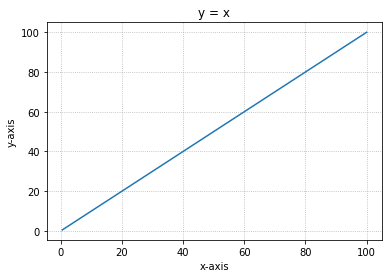

In [65]:
y = x

#Naming the graph
plt.title('y = x')

#Naming x-axis
plt.xlabel('x-axis')

#Naming y-axis
plt.ylabel('y-axis')

plt.grid(True, linestyle =':')

#function to plot the graph
plt.plot(x, y)

#function to show the graph
plt.show()



> 2) $ y = x^2 $



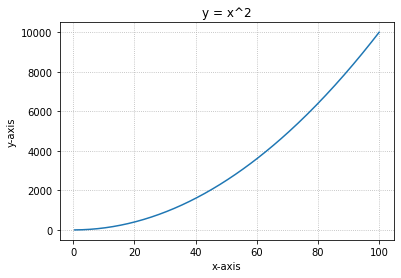

In [66]:
y = x**2

#Naming the graph
plt.title('y = x^2')

#Naming x-axis
plt.xlabel('x-axis')

#Naming y-axis
plt.ylabel('y-axis')

plt.grid(True, linestyle =':')

#function to plot the graph
plt.plot(x, y)

#function to show the graph
plt.show()



>3) $ y = \frac{(x^3)}{100} $



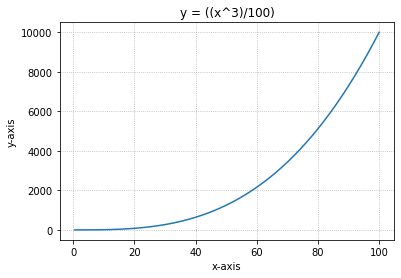

In [67]:
y = (x**3) / 100

#Naming the graph
plt.title('y = ((x^3)/100)')

#Naming x-axis
plt.xlabel('x-axis')

#Naming y-axis
plt.ylabel('y-axis')

plt.grid(True, linestyle =':')

#function to plot the graph
plt.plot(x, y)

#function to show the graph
plt.show()



> 4) $ y=sin(x) $



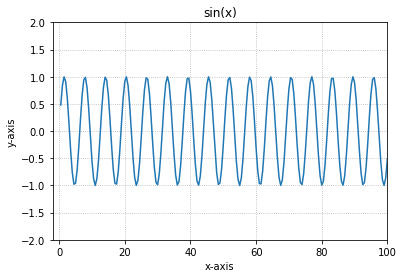

In [68]:
y = np.sin(x)

#Naming of the graph
plt.title('sin(x)')

#Naming x-axis
plt.xlabel('x-axis')

#Naming y-axis
plt.ylabel('y-axis')

plt.grid(True, linestyle =':')
plt.xlim([-2, 100])
plt.ylim([-2, 2])

#function to plot the graph
plt.plot(x, y)

#function to show the graph
plt.show()



> 5) $ y=\frac{sin(x)}{x} $



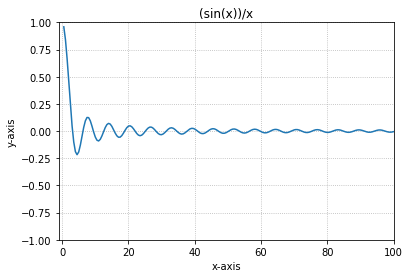

In [69]:
d = np.sin(x)
y= d/x

#Naming the graph
plt.title('(sin(x))/x')

#Naming x-axis
plt.xlabel('x-axis')

#Naming y-axis
plt.ylabel('y-axis')

plt.grid(True, linestyle =':')
plt.xlim([-1, 100])
plt.ylim([-1, 1])

#function to plot the graph 
plt.plot(x, y)

#function to show the graph
plt.show()



> 6) $ y=log(x)$



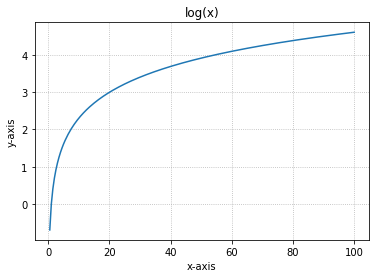

In [70]:
y = np.log(x)

#Naming the graph
plt.title('log(x)')

#Naming x-axis
plt.xlabel('x-axis')

#Naming y-axis
plt.ylabel('y-axis')

plt.grid(True, linestyle =':')

#function to plot the graph
plt.plot(x, y)

#function to show the graph
plt.show()



> 7) $ y=e^x $



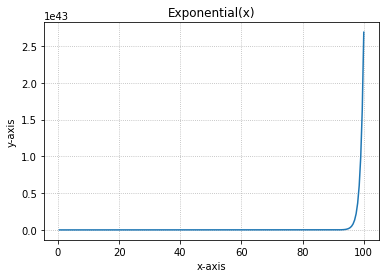

In [71]:
y = np.exp(x)

#Naming the graph
plt.title('Exponential(x)')

#Naming x-axis
plt.xlabel('x-axis')

#Naming y-axis
plt.ylabel('y-axis')

plt.grid(True, linestyle =':')

#function to plot the graph
plt.plot(x, y)

#function to show the graph
plt.show()

#Question 10

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

---



In [114]:
# Using Pandas

import numpy as np
import pandas as pd

# array with uniform distribution
arr = np.random.uniform(1, 2, size=(20,5))

# creating panda dataframe
table = pd.DataFrame(arr, columns=['a','b','c','d','e'])
print("The Panda Dataframe")
print("\n",table)
print("\n")

arr2=[]
arr3=[]

# calculate standart deviation of each column
for column in table:
    arr1 = table[column].std()
    print("Standard Deviation of column:", column,arr1)
    arr2.append(arr1)

# print highest standard deviation
hsd = max(arr2)
print("\nHighest standard deviation amoung all the coulumn: ", hsd)

# calulating mean of each row as a new column
table['mean'] = table.mean(axis = 1)
print("\n")
print(table)

# converting a dataframe to list
arr3 = table['mean'].tolist()
    
#print lowest Mean

lm = np.min(arr3)
print("\nLowest Mean amoung all the rows: ", lm)

The Panda Dataframe

            a         b         c         d         e
0   1.363536  1.263654  1.306055  1.971979  1.048493
1   1.738805  1.166474  1.039179  1.788601  1.339901
2   1.829595  1.079889  1.758136  1.212571  1.228856
3   1.415673  1.486432  1.135686  1.633568  1.138670
4   1.113676  1.215094  1.869875  1.323104  1.070638
5   1.802958  1.925076  1.688168  1.920818  1.503929
6   1.241289  1.149652  1.304307  1.391154  1.458297
7   1.962395  1.842433  1.112642  1.180470  1.882616
8   1.588584  1.378891  1.518414  1.963817  1.049640
9   1.243147  1.594921  1.177075  1.352157  1.505500
10  1.210993  1.766709  1.024077  1.451257  1.268437
11  1.111469  1.428251  1.077143  1.305895  1.053626
12  1.831029  1.242392  1.878869  1.605149  1.232769
13  1.636363  1.878202  1.901635  1.006446  1.341469
14  1.464880  1.826234  1.253305  1.656414  1.219263
15  1.135629  1.758180  1.286376  1.346328  1.095765
16  1.892509  1.245214  1.107111  1.487694  1.301840
17  1.224018  1.691915  

#Question 11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

---



In [135]:
table = pd.DataFrame(arr, columns=['a','b','c','d','e'])
print("The Panda Dataframe")
print(table)

The Panda Dataframe
           a         b         c         d         e
0   1.363536  1.263654  1.306055  1.971979  1.048493
1   1.738805  1.166474  1.039179  1.788601  1.339901
2   1.829595  1.079889  1.758136  1.212571  1.228856
3   1.415673  1.486432  1.135686  1.633568  1.138670
4   1.113676  1.215094  1.869875  1.323104  1.070638
5   1.802958  1.925076  1.688168  1.920818  1.503929
6   1.241289  1.149652  1.304307  1.391154  1.458297
7   1.962395  1.842433  1.112642  1.180470  1.882616
8   1.588584  1.378891  1.518414  1.963817  1.049640
9   1.243147  1.594921  1.177075  1.352157  1.505500
10  1.210993  1.766709  1.024077  1.451257  1.268437
11  1.111469  1.428251  1.077143  1.305895  1.053626
12  1.831029  1.242392  1.878869  1.605149  1.232769
13  1.636363  1.878202  1.901635  1.006446  1.341469
14  1.464880  1.826234  1.253305  1.656414  1.219263
15  1.135629  1.758180  1.286376  1.346328  1.095765
16  1.892509  1.245214  1.107111  1.487694  1.301840
17  1.224018  1.691915  1.

In [136]:
table['f'] = table.sum(axis = 1)
print("New Column 'f' added")
print(table)

New Column 'f' added
           a         b         c         d         e         f
0   1.363536  1.263654  1.306055  1.971979  1.048493  6.953717
1   1.738805  1.166474  1.039179  1.788601  1.339901  7.072960
2   1.829595  1.079889  1.758136  1.212571  1.228856  7.109047
3   1.415673  1.486432  1.135686  1.633568  1.138670  6.810029
4   1.113676  1.215094  1.869875  1.323104  1.070638  6.592386
5   1.802958  1.925076  1.688168  1.920818  1.503929  8.840949
6   1.241289  1.149652  1.304307  1.391154  1.458297  6.544698
7   1.962395  1.842433  1.112642  1.180470  1.882616  7.980556
8   1.588584  1.378891  1.518414  1.963817  1.049640  7.499346
9   1.243147  1.594921  1.177075  1.352157  1.505500  6.872799
10  1.210993  1.766709  1.024077  1.451257  1.268437  6.721473
11  1.111469  1.428251  1.077143  1.305895  1.053626  5.976383
12  1.831029  1.242392  1.878869  1.605149  1.232769  7.790209
13  1.636363  1.878202  1.901635  1.006446  1.341469  7.764114
14  1.464880  1.826234  1.253305  

In [138]:
table['g'] = table['f'].apply(lambda x: ("LT8" if x < 8 else "GT8"))
print(table)

           a         b         c         d         e         f    g
0   1.363536  1.263654  1.306055  1.971979  1.048493  6.953717  LT8
1   1.738805  1.166474  1.039179  1.788601  1.339901  7.072960  LT8
2   1.829595  1.079889  1.758136  1.212571  1.228856  7.109047  LT8
3   1.415673  1.486432  1.135686  1.633568  1.138670  6.810029  LT8
4   1.113676  1.215094  1.869875  1.323104  1.070638  6.592386  LT8
5   1.802958  1.925076  1.688168  1.920818  1.503929  8.840949  GT8
6   1.241289  1.149652  1.304307  1.391154  1.458297  6.544698  LT8
7   1.962395  1.842433  1.112642  1.180470  1.882616  7.980556  LT8
8   1.588584  1.378891  1.518414  1.963817  1.049640  7.499346  LT8
9   1.243147  1.594921  1.177075  1.352157  1.505500  6.872799  LT8
10  1.210993  1.766709  1.024077  1.451257  1.268437  6.721473  LT8
11  1.111469  1.428251  1.077143  1.305895  1.053626  5.976383  LT8
12  1.831029  1.242392  1.878869  1.605149  1.232769  7.790209  LT8
13  1.636363  1.878202  1.901635  1.006446  1.34

In [139]:
row_count= len(table[table['g']=="LT8"])
print("Number of rows with value 'LT8': ",row_count)

Number of rows with value 'LT8':  19


In [141]:
sf = table[table['g']=="LT8"]['f']
print(sf)

0     6.953717
1     7.072960
2     7.109047
3     6.810029
4     6.592386
6     6.544698
7     7.980556
8     7.499346
9     6.872799
10    6.721473
11    5.976383
12    7.790209
13    7.764114
14    7.420096
15    6.622277
16    7.034368
17    7.034833
18    7.257869
19    7.288045
Name: f, dtype: float64


In [144]:
# calculating standard deviation of 'f' values where 'g'=="LT8"
arr4 = sf.std()
print(arr4)

0.4924629253159591


In [145]:
sf2 = table[table['g']=="GT8"]['f']
print(sf2)

5    8.840949
Name: f, dtype: float64


In [147]:
# calculating standard deviation of 'f' values where 'g'=="GT8"
arr5 = sf2.std()
print(arr5)

nan


#Question 12

Write a small piece of code to explain broadcasting in numpy.

---



Broadcasting in numpy helps to perform arithmatic operations on arrays with different shapes and sizes. As an example two arrays '**a**' and '**b**' of different row and column size is taken, '**a**' is size of **[3x1]** where as '**b**' is of **[1x4]** and arithmatic addition is performed which resulted in a mattrix of **[3x4]**.

In [153]:
# Example to show broadcasting in numpy

import numpy as np

a = np.arange(3)
b = np.arange(4)[:, np.newaxis]

print("Array A:",a)
print("\nArray B:",b)

print("\nAfter Addition")
print(a+b)
print("\nAfter Multiplication")
print(a*b)

Array A: [0 1 2]

Array B: [[0]
 [1]
 [2]
 [3]]

After Addition
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]

After Multiplication
[[0 0 0]
 [0 1 2]
 [0 2 4]
 [0 3 6]]


#Question 13

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

---





> Without Using argmin()





In [181]:
import numpy as np
a = np.array([11,2,4,1,5,7,1,0,23,44])
n = len(a)

In [185]:
min= a[0]

for i in range(0,n):
    if (a[i]<=min):
        min=a[i]
        index=i
        continue
    else:
        min=min

print("Minnimun value: ", min)  
print("Index of smallest element: ", index)

Minnimun value:  0
Index of smallest element:  7




> Using argmin()



In [186]:
print("Indix of smallest element : ", np.argmin(a, axis=0))

Indix of smallest element :  7


**Note:-** If there are more than one smallest elements in the array then my solution or solution 1: (without using argmin()) will give the last index position that element, whereas, solution 2: (using argmin()) will return the first occurance' index position.